In [1]:
#conda install -c conda-forge xgboost

In [2]:
#conda install -c conda-forge mlxtend

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

* Потрібно створити кілька моделей класифікації (логістична регресія, svm, k-mean, NBC, Decision Tree and Random Forest) для порівняння результатів.
* Для того, щоб можна було порівнювати ваші результати, зробіть крос-валідацію на 4 фолди.
* Підберіть параметри так, щоб отримати найкращі результати.

In [4]:
dib_df = pd.read_csv('Data/diabetes.csv')

In [5]:
dib_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
def ploting(features):
    for f in list(features):
        plt.figure()
        yield f, dib_df[f].plot(kind='hist');
g = ploting(dib_df.columns)

('Pregnancies', <AxesSubplot:ylabel='Frequency'>)

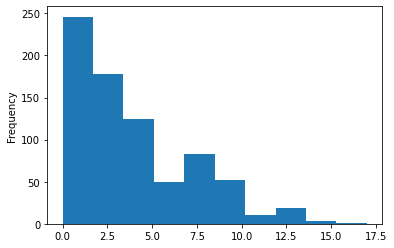

In [7]:
next(g)

In [8]:
dib_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
dib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
dib_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
y = dib_df['Outcome']
X = dib_df.drop(['Outcome'], axis=1)

In [12]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

CV = 4

dtc = DecisionTreeClassifier()
ada = AdaBoostClassifier()
ranfor = RandomForestClassifier()
logreg = LogisticRegression()
xgboo = XGBClassifier()
svc = SVC()

models = [dtc, ada, ranfor, logreg, xgboo, svc]

In [13]:
my_params = {}
my_params['max_depth'] = [None, 1, 3, 5]
my_params['C'] = [0.5, 1, 2, 5]
my_params['n_estimators'] = [50, 100, 200]
my_params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
my_params['ccp_alpha'] = [0.0, None, 1.0]
my_params['random_state'] = [42]
my_params['class_weight'] = ['balanced']
my_params['criterion'] = ['gini', 'entropy']

In [14]:
my_params

{'max_depth': [None, 1, 3, 5],
 'C': [0.5, 1, 2, 5],
 'n_estimators': [50, 100, 200],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'ccp_alpha': [0.0, None, 1.0],
 'random_state': [42],
 'class_weight': ['balanced'],
 'criterion': ['gini', 'entropy']}

In [15]:
problems = []
best_params = {}

In [16]:
def model_change(models):
    global my_params, CV
    for m in models:
        print(m,'\n')
        params = {}
        for mp in list(my_params):
            if mp in m.get_params().keys():
                mpv = my_params.get(mp)
                params.update({mp: mpv})
        print('starting params : \n', params, '\n')
        mdl = GridSearchCV(estimator=m, param_grid=params, cv=CV, verbose=0)
        mdl.fit(X,y)
        grid_s_cv = pd.DataFrame(mdl.cv_results_)
        print('best params :')
        res = grid_s_cv.loc[grid_s_cv['rank_test_score'] == 1]['params'].values[0]
        print(res)
        best_params.update({m: res})
        yield grid_s_cv[grid_s_cv['rank_test_score'] == 1]
mc = model_change(models)

In [17]:
next(mc)

DecisionTreeClassifier() 

starting params : 
 {'max_depth': [None, 1, 3, 5], 'ccp_alpha': [0.0, None, 1.0], 'random_state': [42], 'class_weight': ['balanced'], 'criterion': ['gini', 'entropy']} 

best params :
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'random_state': 42}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_class_weight,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
7,0.003508,0.000499,0.000988,0.000015,0.0,balanced,entropy,5,42,"{'ccp_alpha': 0.0, 'class_weight': 'balanced',...",0.71875,0.692708,0.78125,0.729167,0.730469,0.032185,1


In [18]:
best_params

{DecisionTreeClassifier(): {'ccp_alpha': 0.0,
  'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 5,
  'random_state': 42}}